# FPGA Grayscale Operation

---

Code in this notebook is adapted from notebooks accompanying Xilinx Composable Pipeline. The composable pipeline allows the user to route video data through different configurations at runtime after the FPGA overlay has been downloaded. It does this by storing a library of IP cores in static regions on the FPGA and allowing the user to route the data flow through them from the PS. It also supports dynamic loading of even more IP cores into DFX regions but they are not required here.

See below diagram for reference. Pipelines can be implemented both pre and post VDMA. In this case our composable pipeline is as follows:  
Video_In (Color Convert) > Grayscale > Video_In (Pixel Pack)

For more information, see project GitHub page.  
https://github.com/Xilinx/PYNQ_Composable_Pipeline

<img src="../../Images/cv-4pr.png" alt="Composable Pipeline Diagram" width="1000"/>

# Setup

---

In [10]:
from pynq.lib.video import *
from composable_pipeline import ComposableOverlay
from composable_pipeline.libs import *

Download the overlay and instantiate the composable pipeline

In [11]:
ol = ComposableOverlay("../../overlay/cv_dfx_4_pr.bit")
cpipe = ol.composable

Start pipeline

In [12]:
video = HDMIVideo(ol)
video.start()

# Grayscale

Create a very simple pipeline  
Input > Grayscale > Output

---

In [13]:
video_in_in = cpipe.video.hdmi_in.color_convert
video_in_out = cpipe.video.hdmi_in.pixel_pack
greyscale = cpipe.video.composable.rgb2gray_accel

In [14]:
video_pipeline = [video_in_in, greyscale, video_in_out]

cpipe.compose(video_pipeline)

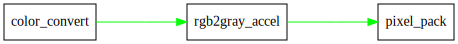

In [15]:
cpipe.graph

# Read HDMI input and output configurations

Determine input size and frames per second. Pipeline should be able to achieve input line rate.

---

In [16]:
source = video._source_in.mode.__dict__
print('Video input')
print('Resolution:', source['width'], 'x',source['height'])
print('FPS:', source['fps'])

Video input
Resolution: 1280 x 720
FPS: 60


In [17]:
source = video._hdmi_out.mode.__dict__
print('Video output')
print('Resolution:', source['width'], 'x',source['height'])
print('FPS:', source['fps'])

Video output
Resolution: 1280 x 720
FPS: 60


# Stop video pipeline

---

In [18]:
video.stop()